# __1. Importing Data Packages__

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Data preprocessing
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset into DataFrame
raw_data = pd.read_csv('./Titanic-Dataset.csv')

# __2. Dataset Overview__

In [3]:
# Top 5 rows
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Column names
raw_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Information about the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
raw_data['Pclass'].unique()

array([3, 1, 2])

In [7]:
# stats of the dataset
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#  __3. Exploratory Data Analysis__

In [8]:
# Copying the data
data = raw_data.copy(deep=True)

In [9]:
# Splitting into different data types
numcols = data.select_dtypes(include=['int64', 'float64']).columns
objcols = data.select_dtypes(include=['object']).columns

## __3.1. Finding Unwanted Columns__

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
unwanted_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']

## __3.2. Finding Missing Values__

What is Missing Data?

    Missing data means absence of observations in columns. 
    It appears in values such as “0”, “NA”, “NaN”, “NULL”, “Not Applicable”, “None”.

Two ways to solve missing values. There are,
- Deletion
- Imputation

In [12]:
print("Missing values and their percentage: ")
for column in data.columns:
    if data[column].isnull().any():
        print(f'\nColumn: {column} \
        \tValues: {data[column].isnull().sum()} \
        \tPercentage: {round((data[column].isnull().sum())/data.shape[0]*100, 2)}% \
        \tType: {data[column].dtype}'
)

Missing values and their percentage: 

Column: Age         	Values: 177         	Percentage: 19.87%         	Type: float64

Column: Cabin         	Values: 687         	Percentage: 77.1%         	Type: object

Column: Embarked         	Values: 2         	Percentage: 0.22%         	Type: object


## __3.3. Finding Duplicated Values__

In [13]:
if data.duplicated().any() is True:
    print(data.duplicated().sum())
else :
    print('There is no duplicated values present in this dataset.')

There is no duplicated values present in this dataset.


__There is no duplicated values.__

In [14]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

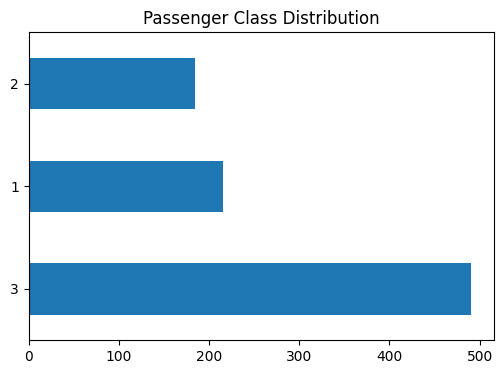

In [15]:
plt.figure(figsize=(6,4))
data['Pclass'].value_counts().plot(kind='barh')
plt.title('Passenger Class Distribution')
plt.show()

## __3.4. Relationship between Categorical Features and Label__

### __3.4.1 What is the percentage of people survived in each class?__

In [16]:
class_per_survived = data.groupby(by='Pclass').sum()['Survived']
total = data.groupby(by='Pclass').size()
class_per_survived/total*100

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64

Text(0.5, 1.0, 'Survived and Died per class')

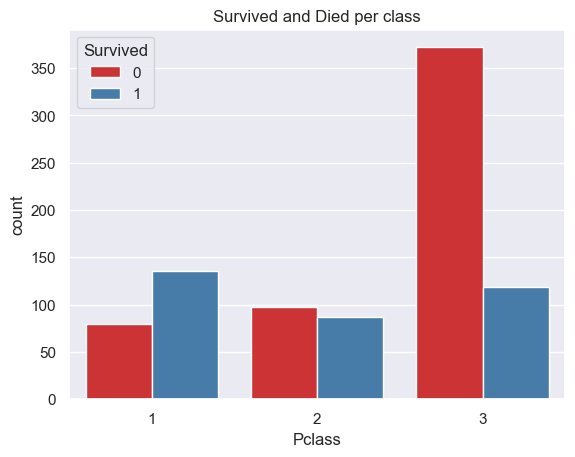

In [17]:
sns.set_theme(style='darkgrid')
sns.countplot(data=data, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survived and Died per class', size=12)

### __3.4.2 What percentage of Men and Women survived?__

In [18]:
data.groupby(by='Sex').sum()['Survived']/data.groupby(by='Sex').size()*100


Sex
female    74.203822
male      18.890815
dtype: float64

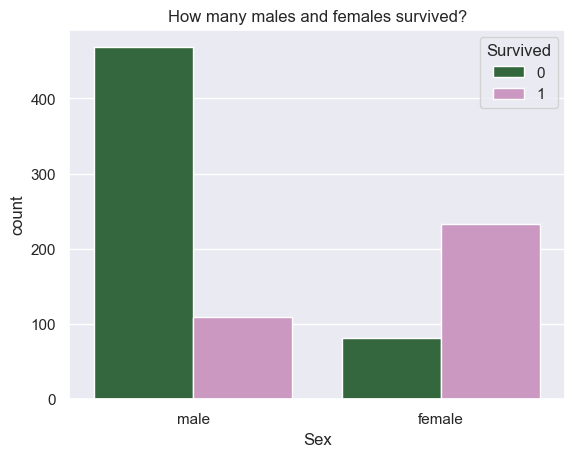

In [19]:
sns.countplot(data=data, x='Sex', hue='Survived', palette='cubehelix')
plt.title('How many males and females survived?')
plt.show()

## __3.5 Explore the Numerical Features__

Text(0.5, 1.0, 'Age Distribution')

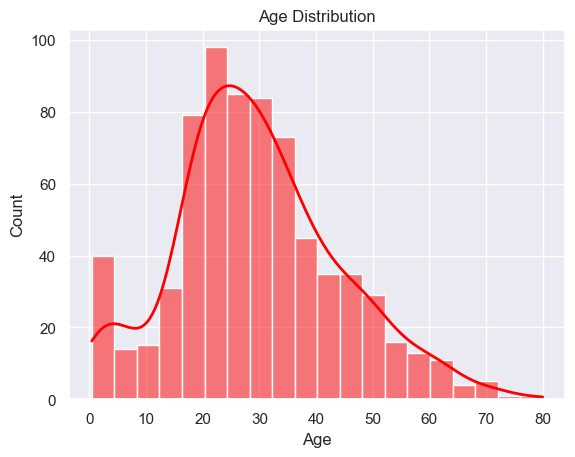

In [20]:
sns.histplot(
    data=data, 
    x='Age', 
    kde=True, 
    stat='count', 
    color='red', 
    line_kws={'linewidth':2},
    alpha=0.5
    )
plt.title('Age Distribution', size=12)

<Figure size 1000x700 with 0 Axes>

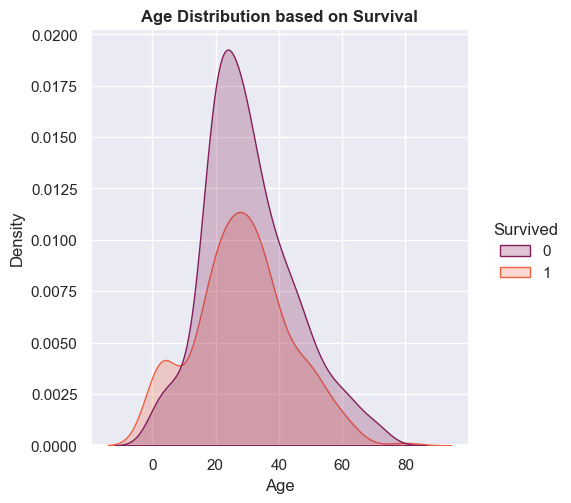

In [21]:
plt.figure(figsize=(10,7))
sns.displot(data=data, x='Age', hue='Survived', kind='kde', fill=True, legend=True, palette='rocket', zorder=3)
plt.title('Age Distribution based on Survival', fontweight='heavy', fontsize=12)
plt.show()

## __3.6 Finding Outliers__

<AxesSubplot: xlabel='Survived', ylabel='Age'>

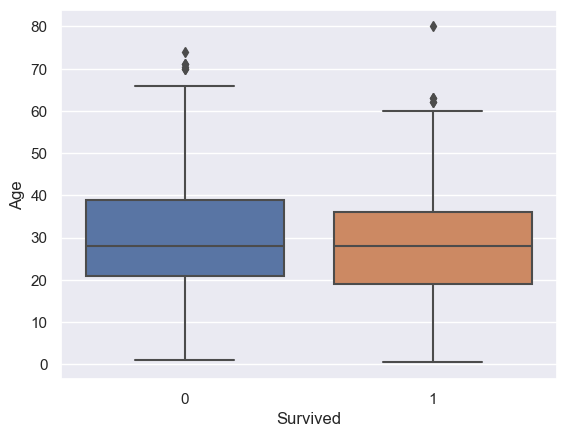

In [22]:
sns.boxplot(data=data, x='Survived', y='Age')

## __3.7 Correlation Analysis__

In [23]:
data.corr()['Survived'].sort_values(ascending=True)

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

# __4. Feature Engineering__

## __4.1 Removing unwanted columns__

In [24]:
data.drop(
    columns=['Cabin', 'PassengerId', 'Parch', 'Name', 'SibSp', 'Ticket'],
    inplace=True)

## __4.2 Handling missing values__

In [25]:
embarked_mode= data['Embarked'].mode()
data['Embarked'].fillna(value=embarked_mode, inplace=True)

In [26]:
age_median = data['Age'].median()
data['Age'].fillna(value=age_median, inplace=True)

## __4.3 Handling categorical features__

In [27]:
from sklearn.preprocessing import LabelEncoder #only on series
encode = LabelEncoder()
data['Sex'] = encode.fit_transform(data['Sex'].values)
data['Embarked'] = encode.fit_transform(data['Embarked'].values)

# __5. Building the model__

## __5.1 Determine Features & Target Variables__

In [28]:
features = data.drop(columns=['Survived'])
target = data['Survived']

## __5.2 Split the dataset into Traing and Test sets__

In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(features, target, train_size=0.8, random_state = True)

In [30]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (712, 5)
xtest shape:  (179, 5)
ytrain shape:  (712,)
ytest shape:  (179,)


## __5.3 Scale data using StandardScaler__

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(xtrain)
xtrain = scale.transform(xtrain)
xtest = scale.transform(xtest)

## __5.4 Train the Model__

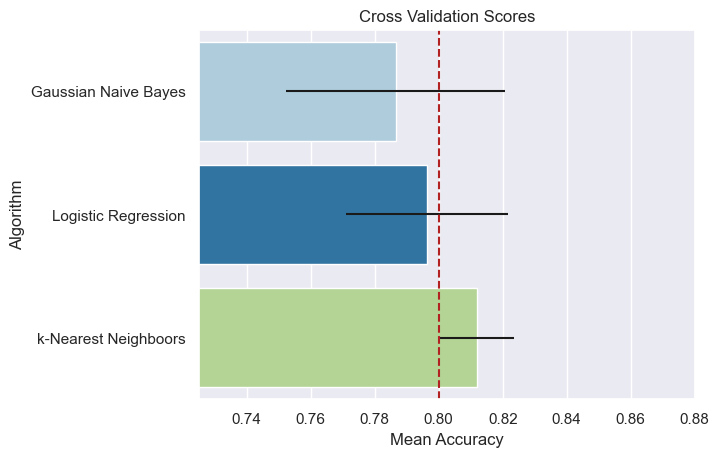

In [32]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
random_state = 1

# Step 1: create a list containing all estimators with their default parameters
clf_list = [GaussianNB(), 
            LogisticRegression(random_state = random_state),
            KNeighborsClassifier() 
]


# Step 2: calculate the cv mean and standard deviation for each one of them
cv_base_mean, cv_std = [], []
for clf in clf_list:  
    
    cv = cross_val_score(clf, xtrain, y = ytrain, scoring = 'accuracy', cv = 5, n_jobs = -1)
    
    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())

    
# Step 3: create a dataframe and plot the mean with error bars
cv_total = pd.DataFrame({'Algorithm': ['Gaussian Naive Bayes', 'Logistic Regression', 'k-Nearest Neighboors'],
                        'CV-Means': cv_base_mean, 
                        'CV-Errors': cv_std})

sns.barplot(x='CV-Means', y='Algorithm', data = cv_total, palette = 'Paired', orient = 'h', **{'xerr': cv_std})
plt.xlabel('Mean Accuracy')
plt.title('Cross Validation Scores')
plt.xlim([0.725, 0.88])
plt.axvline(x = 0.80, color = 'firebrick', linestyle = '--');

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
best_fit = model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

## __5.5 Model Evaluation__

In [34]:
from sklearn import metrics
ac = metrics.accuracy_score(ytest, ypred)
cm = metrics.confusion_matrix(ytest, ypred)
cr= metrics.classification_report(ytest, ypred)

print(ac)
print(cm)
print(cr)

0.7932960893854749
[[92 14]
 [23 50]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       106
           1       0.78      0.68      0.73        73

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [35]:
df_compare = pd.DataFrame({'Actual':ytest, 'Predicted':ypred}).reset_index(drop=True)
df_compare.head()

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,1
4,1,1
